## Домашняя работа 3.

❗Максимальный балл за задание основное задание - 16, они переводятся в 10-ую шкалу. 2 балла являются бонусными, они же в 10-ой шкале.

✨Ребята, мы надеемся, что этот курс был полезен и с информативной точки зрения, и с точки зрения наполненности и интересности, но самое важное - это то, что останется с вами после ваших долгих часов практики и усердной работы, поэтому третья домашка направлена на закрепеление тех основ, которыми вы должны владеть обязательно, а главное понимать, зачем вы это делаете, и на сравнение "деревянных" моделей, поэтому большая часть домашки для вас должна быть уже знакома и понятна, приятна для выполнения, а часть связанная со сравнением будет красивым дополнением к отработке материала с занятия. Даже если не все из вас будут использовать все, что мы с вами прошли, то есть надежда на то, что курс помог вам расширить кругозор и дать больше понимания об интересных областях анализа данных, с которым вы непосредственно работаете или просто пересекаетесь по учебе✨

Удачи!

## Данные


В этой домашней работе мы будем обучать модели машинного обучения, ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week

Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

**Данные на гитхабе в папке data**

## Метрика качества

В задании мы будем оценивать качество моделей с помощью метрики AUC-ROC.

## Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, регуляризация в линейной модели или максимальная глубина решающего дерева). Каждая модель обычно имеет множество гиперпараметров, и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется). Однако в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать:

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение (`train`), валидация (`validation`) и контроль (`test`). Валидационную подвыборку используют для сравнения моделей, а `test` — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://en.wikipedia.org/wiki/Cross-validation_(statistics). Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов:
  - сетку можно делать более разреженной, перебирая меньше значений каждого параметра; однако, надо не забывать, что в таком случае можно пропустить хорошую комбинацию параметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
  - параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации параметров, а небольшое число случайно выбранных.

## Задание

Давайте сначала загрузим все необходимые нам библиотеки

In [2]:
#your code here

import pandas as pd

# все, которые еще сочтете нужными

Загрузите набор данных *data.adult.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [ ]:
#your code here


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K


Иногда в данных встречаются пропуски. Как задаются пропуски обычно либо прописывается в описании к данным, либо просто на месте пропуска после чтения данных оказывается значение numpy.nan. Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html).

В данном датасете пропущенные значения обозначены как "?".

**Задание 1 (1 балл)** Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.

In [ ]:
#your code here


Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем:

 - Выделите целевую переменную в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату (название целевой переменной >50K,<=50K)
 - Обратите внимание, что не все признаки являются вещественными. В начале мы будем работать только с вещественными признаками. Выделите их отдельно.

In [6]:
#your code here


## Обучение классификаторов на вещественных признаках

В данном разделе необходимо будет работать только с вещественными признаками и целевой переменной.

В начале посмотрим как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 3 алгоритма:
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
 - [GradientBoosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

Для начала выберем один гиперпараметр, который будем оптимизировать:
 - (*max_depth*)

Остальные параметры оставляйте в значениях по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). В качестве схемы кросс-валидации используйте 5-fold cv, которую можно задать с помощью класса [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

**Задание 2 (2 балла)** Для каждого из трех алгоритмов подберите оптимальные значения указанных гиперпараметров.

In [ ]:
#your code here



Что вы можете сказать?

In [ ]:
# your answer here


**Задание 3 (1 балл)** Также подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев, так что при увеличении этого гиперпараметра его качество не будет становиться хуже. Поэтому подберите такое количество деревьев, при котором качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте это количество деревьев.

**Что значит "качество стабилизируется"?**

Это означает, что при увеличении количества деревьев (n_estimators) метрика качества (например, точность или F1-score) перестает существенно расти. Например, если при n_estimators=100 точность составляет 0.90, а при n_estimators=200 — 0.91, а при n_estimators=500 — 0.911, то можно считать, что качество стабилизировалось при n_estimators=200.

*(Пример искусственный)*

In [16]:
#your code here

**Задание 4 (1 балл)** Подберём число деревьев (*n_estimators*) в алгоритме GradientBoosting. Мы знаем, что ошибка бустинга на тестовых данных, как правило, имеет U-образную форму, то есть сначала уменьшается, а при достижении некоторого числа деревьев начинает расти. Нарисуйте график ошибки в зависимости от числа деревьев. Подберите n_estimators, соответствующий минимуму ошибки.

In [ ]:
#your code here

При обучении алгоритмов стоит обращать внимание не только на качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это как-то могло повлиять на качество давайте посмотрим на сами признаки.

**Задание 5 (1 балл)** Постройте гистограммы для признаков *age*, *fnlwgt*, *capital-gain*. Глядя на получившиеся графики в чем заключается особенность данных? На какие алгоритмы это может повлиять? Может ли масшитабирование повлиять на работу этих алгоритмов?

In [ ]:
#your code here

In [ ]:
#your answer here

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).

**Задание 6 (2 балла)** Масштабируйте все вещественные признаки одним из указанных способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

In [ ]:
#your code here

Изменилось ли качество у некоторых алгоритмов?

**Задание 7 (3 балла)** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае:
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - GradientBoosting — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)

Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели"

In [ ]:
#your code here

Какой из алгоритмов имеет наилучшее качество?

In [18]:
#your answer here

**Задание 8 (1 балла)** Сравните алгоритмы с точки зрения времени обучения с помощью библиотеки [time](https://www.geeksforgeeks.org/python-time-module/) или [tqdm](https://pypi.org/project/tqdm/). Обучение какого из алгоритмов работает дольше всего и, как вы думаете, почему?

In [ ]:
#your code here

In [ ]:
#your answer here

## Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков.

**Задание 9 (1 балл)** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) из sklearn).

In [ ]:
#your code here

**Задание 10 (1 балл)** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами из предыдущего пункта. Дало ли добавление новых признаков прирост качества? Измеряйте качество как и раньше используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [ ]:
#your code here

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

In [ ]:
#your answer here


**Задание 11 (2 балла)**

Раз уж тут новогоднее настроение должно быть, то напишите пиьмо Деду Морозу со своими пожеланиями на грядущий год, упакуйте в красивый конверт, и сделайте крутую фотку этого письма под новогодней наряженной елкой 🌠
Показывать что вы написали ни в коем случае не надо)

In [20]:
#your photo here

Бонусное задание внизу :)

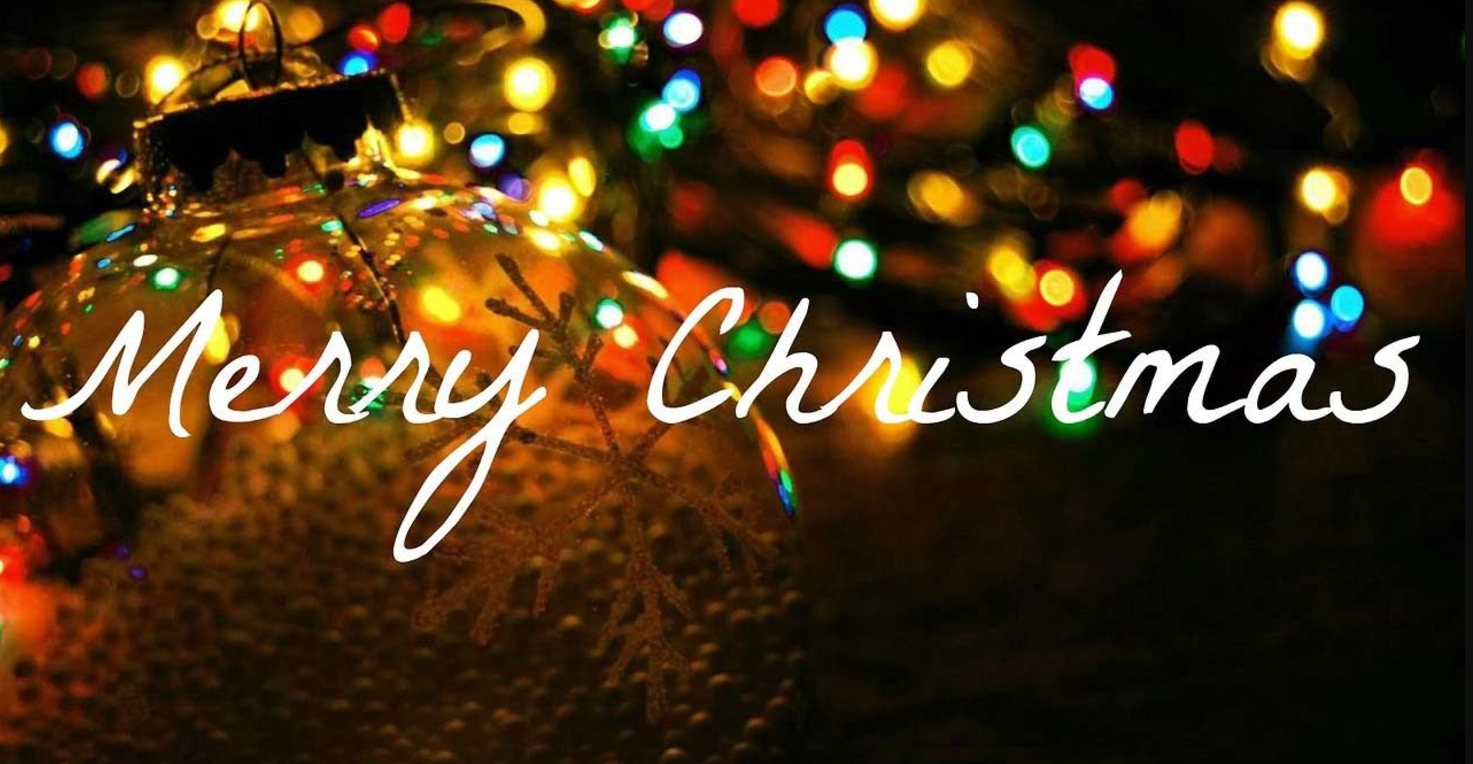

![image](https://storage.googleapis.com/s4a-prod-share-preview/default/st_app_screenshot_image/c189121e-1ffe-4a05-9844-2a2fe0e4444c/Home_Page.png)

## Бонусное задание (2 балла)

В качестве бонусного задания предлагаю вам развернуть свое собственное приложение в *Streamlit*.
DataScience - это огромная сфера, в которой уживаются множество разнообразных специальностей. Дата аналитики, дата ~~сатанисты~~ саентисты, мл инженеры и многие другие. Так как рынок очень быстро растет, то потребность постоянно обновлять знания повышается также как и требования от специалистов. На данный момент очень ценятся навыки работы в смежных областях науки о данных. Написание своего приложения - это небольшая попытка соединить бэкненд и дата саенс.

**Что нужно сделать?**

Чтобы успешно развернуть свое приложения на Streamlit нужно сделать несколько простых действий:

1) Создать новый публичный репрезиторий на Гитхаб
2) Клонировать этот репрезиторий на компьютер
3) В папке с репрезиторием создать виртуальное окружение (не забудьте добавить его в .gitignore)
4) Создать приложение Streamlit, которое будет работать на основе вашей лучшей модели из этого домашнего задания
5) Запушить приложение на Гитхаб, не забыв создать файл requirements.txt
6) Развернуть (задеплоить) приложение на [Streamlit Cloud](https://streamlit.io/cloud)

**Требования к приложению**

Приложение должно быть аккуратно оформлено, так, чтобы не стыдно было показать маме. Пользователь, который будет взаимодействовать с приложением, будет сам вбивать данные как в примере [тут](https://rateyourflight.streamlit.app/). Модель должна предсказывать человеку превысит ли его средний заработок порог $50k. Не стесняйтесь проявлять креативность, делайте так, чтобы с приложением было бы удобно взаимодействовать.

**В качестве ответа на это задание вставьте ссылку на репрезиторий Гитхаб и ссылку на приложение в интернете.**



In [22]:
# ваши ссылки